In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import re

In [2]:
collectedData = {}
df_grad_cd_list = []
for dir1 in os.listdir("CollectedData"):
    if os.path.isdir(os.path.join("CollectedData", dir1)):
        
        collectedData[dir1] = {}
        for dsn_dir in os.listdir(os.path.join("CollectedData", dir1)):
            if os.path.isdir(os.path.join("CollectedData", dir1, dsn_dir)):
                data = json.load(open(os.path.join("CollectedData", dir1, dsn_dir, "dsn_data.json"), "r"))
                collectedData[dir1][dsn_dir] = data

In [3]:
re_log_line = r"\|\s+\d+(\|\s+-?\d+\.\d+){4}\|\n"

dir_list = []
dfs = []
dv_mat = []
surf_dfs = []
surf_cd_dfs = []

#df_meta = pd.DataFrame(columns=["AOA"])
meta_rows = []

result_rows = []
for dir1 in sorted(collectedData.keys()):
    if dir1.startswith("T003") or dir1.startswith("T005"):
        for dsn_dir in sorted(collectedData[dir1].keys()):
            dir_str = f"{dir1} {dsn_dir}"
            print(dir_str)
            field_names = ["config_DSN.cfg", "grad_cd", "surface_adjoint_drag", "surface_flow", "log_direct"]
            if len(collectedData[dir1][dsn_dir].keys() & set(field_names)) < len(field_names):
                print("skipping", dir_str)
                continue
            if "config_DSN.cfg" in collectedData[dir1][dsn_dir]:
                config_lines = collectedData[dir1][dsn_dir]["config_DSN.cfg"]
                dv_line = [l for l in config_lines if l.startswith("DV_VALUE=")][-1].strip()
                #print(dv_line)
                dvs = [float(x) for x in dv_line[10:].split(", ")]
                #if len(dvs) < 30:
                #    print(dir1, dsn_dir)
                #    continue
                #print(dvs)
                if len(dvs) == 38:
                    dv_mat.append(dvs)
            if "grad_cd" in collectedData[dir1][dsn_dir]:
                df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["grad_cd"])
                df["DIR"] = dir_str
                dfs.append(df)
                dir_list.append(f"{dir1} {dsn_dir}")
            if "surface_adjoint_drag" in collectedData[dir1][dsn_dir]:
                surf_df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["surface_adjoint_drag"])
                surf_df["DIR"] = dir_str
                surf_cd_dfs.append(surf_df)
            if "surface_flow" in collectedData[dir1][dsn_dir]:
                surf_df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["surface_flow"])
                surf_df["DIR"] = dir_str
                surf_dfs.append(surf_df)
            if "log_direct" in collectedData[dir1][dsn_dir]:
                log_lines = collectedData[dir1][dsn_dir]["log_direct"]
                log_lines_iter = [l for l in log_lines if re.match(re_log_line, l)]#[-100:]
                lls = log_lines_iter[-1].split("|")[1:-1]
                iteration = int(lls[0])
                rms_rho = float(lls[1])
                rms_nu = float(lls[2])
                c_L = float(lls[3])
                c_D = float(lls[4])
                #print(dir_str, c_L, c_D)
                result_rows.append((dir_str, c_L, c_D, rms_rho, rms_nu))
            if "flow.meta" in collectedData[dir1][dsn_dir]:
                #print(collectedData[dir1][dsn_dir]["flow.meta"])
                #break
                for l in collectedData[dir1][dsn_dir]["flow.meta"]:
                    if l.startswith("AOA="):
                        meta_rows.append((dir_str, float(l.strip().split()[1])))

#dv_mat = np.asarray(dv_mat)
df_result = pd.DataFrame(columns=["DIR", "c_L", "c_D", "rms_rho", "rms_nu"], data=result_rows)
df_meta =  pd.DataFrame(columns=["DIR", "AOA"], data=meta_rows)
df_result = df_result.merge(df_meta, on="DIR")

T003_turb DSN_002
T003_turb DSN_003
T003_turb DSN_004
T003_turb DSN_005
T003_turb DSN_006
T003_turb DSN_007
T003_turb DSN_008
T003_turb DSN_009
T003_turb DSN_010
T003_turb DSN_011
T003_turb DSN_012
T003_turb DSN_013
T003_turb DSN_014
T003_turb DSN_015
T003_turb DSN_016
T003_turb DSN_017
T003_turb DSN_018
T003_turb DSN_019
T003_turb DSN_020
T003_turb DSN_021
T003_turb DSN_022
T003_turb DSN_023
T003_turb DSN_024
T003_turb DSN_025
T003_turb DSN_026
T003_turb DSN_027
T003_turb DSN_028
T003_turb DSN_029
T003_turb DSN_030
T003_turb DSN_031
T003_turb DSN_032
T003_turb DSN_033
T003_turb DSN_034
T003_turb DSN_035
T003_turb DSN_036
T003_turb DSN_037
T003_turb DSN_038
T003_turb DSN_039
T003_turb DSN_040
T003_turb DSN_041
T003_turb DSN_042
T003_turb DSN_043
T003_turb DSN_044
T003_turb DSN_045
T003_turb DSN_046
T003_turb DSN_047
T003_turb DSN_048
T003_turb DSN_049
T003_turb DSN_050
T003_turb DSN_051
T003_turb DSN_052
T003_turb DSN_053
T003_turb DSN_054
T003_turb DSN_055
T003_turb DSN_056
T003_turb 

T005_turb DSN_074
T005_turb DSN_075
T005_turb DSN_076
T005_turb DSN_077
T005_turb DSN_078
T005_turb DSN_079
T005_turb DSN_080
T005_turb DSN_081
T005_turb DSN_082
T005_turb DSN_083
T005_turb DSN_084
T005_turb DSN_085
T005_turb DSN_086
T005_turb DSN_087
T005_turb DSN_088
T005_turb DSN_089
T005_turb DSN_090
T005_turb DSN_091
T005_turb DSN_092
T005_turb DSN_093
T005_turb DSN_094
T005_turb DSN_095
T005_turb DSN_096
T005_turb DSN_097
T005_turb DSN_098
T005_turb DSN_099
T005_turb DSN_100
T005_turb DSN_101
T005_turb DSN_102
T005_turb DSN_103
T005_turb DSN_104
T005_turb DSN_105
T005_turb DSN_106
T005_turb DSN_107
T005_turb DSN_108
T005_turb DSN_109
T005_turb DSN_110
T005_turb DSN_111
T005_turb DSN_112
T005_turb DSN_113
T005_turb DSN_114
T005_turb DSN_115
T005_turb DSN_116
T005_turb DSN_117
T005_turb DSN_118
T005_turb DSN_119
T005_turb DSN_120
T005_turb DSN_121
T005_turb DSN_122
T005_turb DSN_123
T005_turb DSN_124
T005_turb DSN_125
T005_turb DSN_126
T005_turb DSN_127
T005_turb DSN_128
T005_turb 

In [4]:
import pickle
dir1 = "T005_turb"
dv_list = pickle.load(open(os.path.join("CollectedData", dir1, "dv_list.p"), "rb"))
dv_mat2 = np.asarray(dv_list) #[:len(dir_list),:]
if len(dv_mat):
    dv_mat = np.vstack((np.asarray(dv_mat), dv_mat2))[:len(dir_list),:]
else:
    dv_mat = dv_mat2[:len(dir_list),:]

In [5]:
np.asarray(dv_mat).shape, dv_mat2.shape

((598, 38), (1000, 38))

In [6]:
df_result

,DIR,c_L,c_D,rms_rho,rms_nu,AOA
0,T003_turb DSN_002,0.724186,0.011605,-6.451430,-8.755026,2.285286
1,T003_turb DSN_003,0.724200,0.011163,-6.454355,-8.759274,2.409032
2,T003_turb DSN_004,0.724185,0.012970,-6.456526,-8.723936,2.223996
3,T003_turb DSN_005,0.724183,0.012497,-6.435272,-8.678649,2.367014
4,T003_turb DSN_006,0.724191,0.012171,-6.454220,-8.800678,2.390727
...,...,...,...,...,...,...
593,T005_turb DSN_212,0.724223,0.014990,-6.461757,-8.612306,1.510643
594,T005_turb DSN_213,0.724109,0.022425,-6.645409,-7.945297,2.402818
595,T005_turb DSN_214,0.724182,0.015348,-6.438945,-8.566054,2.584580
596,T005_turb DSN_215,0.723088,0.028505,-6.387756,-7.493037,3.886795


In [7]:
df_cd_grad = pd.concat(dfs) #.set_index("DIR") #.sort_values("DIR")

In [8]:
df_cd_grad

,VAR,CD_GRAD,STEP,DIR
0,0,0.932305,0.001,T003_turb DSN_002
1,1,0.902509,0.001,T003_turb DSN_002
2,2,0.756924,0.001,T003_turb DSN_002
3,3,0.575045,0.001,T003_turb DSN_002
4,4,0.394999,0.001,T003_turb DSN_002
...,...,...,...,...
33,33,-0.419057,0.001,T005_turb DSN_216
34,34,-0.293344,0.001,T005_turb DSN_216
35,35,-0.062856,0.001,T005_turb DSN_216
36,36,0.233226,0.001,T005_turb DSN_216


In [9]:
d_CD = np.resize(df_cd_grad["CD_GRAD"].values, ((len(dir_list), 38)))

In [10]:
#d_CD[2] == df_cd_grad[df_cd_grad["DIR"]=="T003_turb DSN_004"]["CD_GRAD"].values

In [11]:
d_CD.shape

(598, 38)

In [12]:
C = np.dot(d_CD.T, d_CD) / d_CD.shape[0]

In [13]:
np.dot(d_CD.T, d_CD) / d_CD.shape[0]

array([[ 9.77935514e-01,  9.59145023e-01,  8.18145804e-01, ...,
        -1.10568505e-01,  9.46708894e-02,  3.68720405e-01],
       [ 9.59145023e-01,  9.41209122e-01,  8.03375821e-01, ...,
        -1.08070191e-01,  9.32353636e-02,  3.62280455e-01],
       [ 8.18145804e-01,  8.03375821e-01,  6.86321936e-01, ...,
        -9.18737191e-02,  7.99986248e-02,  3.09991406e-01],
       ...,
       [-1.10568505e-01, -1.08070191e-01, -9.18737191e-02, ...,
         3.66887997e-02,  7.95328625e-04, -6.06916004e-02],
       [ 9.46708894e-02,  9.32353636e-02,  7.99986248e-02, ...,
         7.95328625e-04,  3.18935419e-02,  5.76076762e-02],
       [ 3.68720405e-01,  3.62280455e-01,  3.09991406e-01, ...,
        -6.06916004e-02,  5.76076762e-02,  2.57012785e-01]])

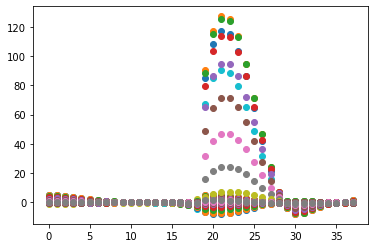

In [14]:
for i in range(38):
    plt.plot(C[i], 'o')

In [15]:
C.shape

(38, 38)

In [16]:
C

array([[ 9.77935514e-01,  9.59145023e-01,  8.18145804e-01, ...,
        -1.10568505e-01,  9.46708894e-02,  3.68720405e-01],
       [ 9.59145023e-01,  9.41209122e-01,  8.03375821e-01, ...,
        -1.08070191e-01,  9.32353636e-02,  3.62280455e-01],
       [ 8.18145804e-01,  8.03375821e-01,  6.86321936e-01, ...,
        -9.18737191e-02,  7.99986248e-02,  3.09991406e-01],
       ...,
       [-1.10568505e-01, -1.08070191e-01, -9.18737191e-02, ...,
         3.66887997e-02,  7.95328625e-04, -6.06916004e-02],
       [ 9.46708894e-02,  9.32353636e-02,  7.99986248e-02, ...,
         7.95328625e-04,  3.18935419e-02,  5.76076762e-02],
       [ 3.68720405e-01,  3.62280455e-01,  3.09991406e-01, ...,
        -6.06916004e-02,  5.76076762e-02,  2.57012785e-01]])

In [17]:
import scipy

In [18]:
from scipy import linalg

In [19]:
l, W = scipy.linalg.eig(C)

In [20]:
np.outer(d_CD[0], d_CD[0]).shape

C2 = np.zeros_like(C)
for i in range(d_CD.shape[0]):
    C2 += np.outer(d_CD[i], d_CD[i].T)

C2 = C2 / d_CD.shape[0]

In [21]:
d_CD[0]

array([ 9.32305e-01,  9.02509e-01,  7.56924e-01,  5.75045e-01,
        3.94999e-01,  2.38223e-01,  1.15757e-01,  3.09355e-02,
       -1.86796e-02, -3.93433e-02, -3.91279e-02, -2.61724e-02,
       -7.66966e-03,  9.85289e-03,  1.82074e-02,  1.28256e-03,
       -8.18707e-02, -3.49449e-01, -1.17100e+00,  3.75622e+00,
        3.49613e+00,  2.88665e+00,  2.17368e+00,  1.46664e+00,
        8.27131e-01,  2.90078e-01, -1.27991e-01, -4.23715e-01,
       -6.02687e-01, -6.76632e-01, -6.62975e-01, -5.86550e-01,
       -4.79741e-01, -3.73426e-01, -2.74779e-01, -1.48658e-01,
        6.07028e-02,  3.38619e-01])

In [22]:
i = 0
np.outer(d_CD[i], d_CD[i].T)#.shape

array([[ 0.86919261,  0.84141365,  0.70568403, ..., -0.1385946 ,
         0.05659352,  0.31569619],
       [ 0.84141365,  0.8145225 ,  0.68313072, ..., -0.13416518,
         0.05478482,  0.3056067 ],
       [ 0.70568403,  0.68313072,  0.57293394, ..., -0.11252281,
         0.04594741,  0.25630885],
       ...,
       [-0.1385946 , -0.13416518, -0.11252281, ...,  0.0220992 ,
        -0.00902396, -0.05033842],
       [ 0.05659352,  0.05478482,  0.04594741, ..., -0.00902396,
         0.00368483,  0.02055512],
       [ 0.31569619,  0.3056067 ,  0.25630885, ..., -0.05033842,
         0.02055512,  0.11466283]])

In [23]:
C[:3,:3], C2[:3,:3]

(array([[0.97793551, 0.95914502, 0.8181458 ],
        [0.95914502, 0.94120912, 0.80337582],
        [0.8181458 , 0.80337582, 0.68632194]]),
 array([[0.97793551, 0.95914502, 0.8181458 ],
        [0.95914502, 0.94120912, 0.80337582],
        [0.8181458 , 0.80337582, 0.68632194]]))

In [24]:
i = 0
C2[0,0], d_CD[:,0]*d_CD[:,0].T / d_CD.shape[0], np.multiply(d_CD[i].T, d_CD[i])

(0.9779355143826018,
 array([1.45349935e-03, 1.27773541e-03, 1.64836676e-03, 1.44458911e-03,
        1.44482848e-03, 1.51450801e-03, 1.67209030e-03, 1.37153272e-03,
        1.62404138e-03, 1.54717594e-03, 1.61455311e-03, 1.60358246e-03,
        1.75227311e-03, 1.70632579e-03, 1.68745922e-03, 1.61183978e-03,
        1.64288251e-03, 1.62708494e-03, 1.58389114e-03, 1.51695342e-03,
        1.51732613e-03, 1.51071326e-03, 1.49191199e-03, 1.60361849e-03,
        1.46618944e-03, 1.29918950e-03, 1.47241551e-03, 1.59491518e-03,
        1.69613828e-03, 1.52820277e-03, 1.81214077e-03, 1.57562790e-03,
        1.57911975e-03, 1.54459056e-03, 1.70143063e-03, 1.62667589e-03,
        1.76029344e-03, 1.52505835e-03, 1.65411294e-03, 1.51972280e-03,
        1.42934502e-03, 1.58412550e-03, 1.69768805e-03, 1.66717107e-03,
        1.47352040e-03, 1.48603571e-03, 1.69856432e-03, 1.74898802e-03,
        1.57948702e-03, 1.58011441e-03, 1.76125437e-03, 1.48484104e-03,
        1.52218199e-03, 1.63151854e-03, 1.3

In [25]:
l

array([6.60659957e+02+0.j, 1.67242876e+01+0.j, 1.71725270e+00+0.j,
       7.06829176e-01+0.j, 4.79312772e-01+0.j, 9.67697606e-02+0.j,
       7.29003917e-02+0.j, 6.30247961e-02+0.j, 2.13127560e-02+0.j,
       1.73263890e-02+0.j, 5.51555565e-03+0.j, 3.39599019e-03+0.j,
       9.61501946e-04+0.j, 4.82102524e-04+0.j, 1.70123461e-04+0.j,
       1.25654588e-04+0.j, 2.97359759e-05+0.j, 2.16025265e-05+0.j,
       6.30368818e-06+0.j, 1.49967544e-06+0.j, 1.28139878e-06+0.j,
       1.75216343e-07+0.j, 1.04722152e-07+0.j, 2.08391953e-08+0.j,
       6.11422772e-09+0.j, 4.39136071e-10+0.j, 5.62735481e-10+0.j,
       1.98180930e-11+0.j, 1.58295405e-11+0.j, 6.31293270e-12+0.j,
       2.08292232e-12+0.j, 1.16517672e-12+0.j, 8.80244162e-13+0.j,
       1.34585515e-13+0.j, 7.89985137e-14+0.j, 3.44175365e-14+0.j,
       1.58755644e-14+0.j, 9.64679100e-15+0.j])

In [26]:
import matplotlib.pyplot as plt

C:\Users\Nils\Anaconda3\envs\MA\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Eigenmodes')

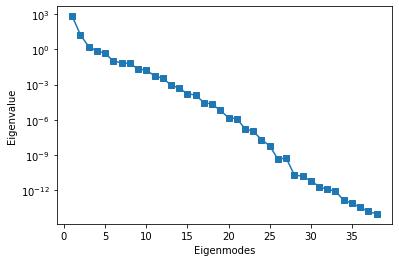

In [27]:
plt.semilogy(range(1,39), l, "-s")
plt.gca().set_ylabel("Eigenvalue")
plt.gca().set_xlabel("Eigenmodes")

C:\Users\Nils\Anaconda3\envs\MA\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Cum. Fraction of Total EV')

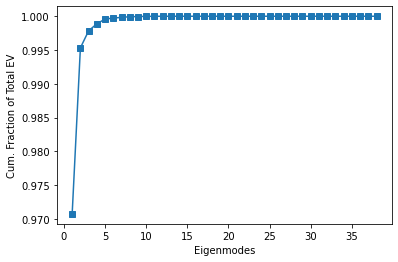

In [28]:
plt.plot(range(1,39), l.cumsum() / l.sum(), "-s")
plt.gca().set_xlabel("Eigenmodes")
plt.gca().set_ylabel("Cum. Fraction of Total EV")

In [29]:
l.cumsum() / float(l.sum())

<ipython-input-29-ddf29ef2c2f3>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  l.cumsum() / float(l.sum())


array([0.9707455 +0.j, 0.99531945+0.j, 0.99784271+0.j, 0.99888129+0.j,
       0.99958557+0.j, 0.99972776+0.j, 0.99983488+0.j, 0.99992749+0.j,
       0.9999588 +0.j, 0.99998426+0.j, 0.99999237+0.j, 0.99999735+0.j,
       0.99999877+0.j, 0.99999948+0.j, 0.99999973+0.j, 0.99999991+0.j,
       0.99999995+0.j, 0.99999999+0.j, 1.        +0.j, 1.        +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 1.        +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 1.        +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 1.        +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 1.        +0.j,
       1.        +0.j, 1.        +0.j])

In [88]:
l

array([6.60659957e+02+0.j, 1.67242876e+01+0.j, 1.71725270e+00+0.j,
       7.06829176e-01+0.j, 4.79312772e-01+0.j, 9.67697606e-02+0.j,
       7.29003917e-02+0.j, 6.30247961e-02+0.j, 2.13127560e-02+0.j,
       1.73263890e-02+0.j, 5.51555565e-03+0.j, 3.39599019e-03+0.j,
       9.61501946e-04+0.j, 4.82102524e-04+0.j, 1.70123461e-04+0.j,
       1.25654588e-04+0.j, 2.97359759e-05+0.j, 2.16025265e-05+0.j,
       6.30368818e-06+0.j, 1.49967544e-06+0.j, 1.28139878e-06+0.j,
       1.75216343e-07+0.j, 1.04722152e-07+0.j, 2.08391953e-08+0.j,
       6.11422772e-09+0.j, 4.39136071e-10+0.j, 5.62735481e-10+0.j,
       1.98180930e-11+0.j, 1.58295405e-11+0.j, 6.31293270e-12+0.j,
       2.08292232e-12+0.j, 1.16517672e-12+0.j, 8.80244162e-13+0.j,
       1.34585515e-13+0.j, 7.89985137e-14+0.j, 3.44175365e-14+0.j,
       1.58755644e-14+0.j, 9.64679100e-15+0.j])

In [199]:
r = 3

In [200]:
#U = np.zeros_like(W)
U = W[:r,:].copy()
l1 = l[:r]

#V = np.zeros_like(W)
V = W[r:,:].copy()
l2 = l[r:]

In [201]:
#U = np.zeros_like(W)
U2 = W[:,:r].copy()
l1 = l[:r]

#V = np.zeros_like(W)
V2 = W[:,r:].copy()
l2 = l[r:]

In [202]:
U - U2.T

array([[ 0.        , -0.17758614,  0.25442295,  0.26991005,  0.27496764,
         0.26816555, -0.0841484 ,  0.00672795,  0.05536383,  0.00144052,
         0.04395747, -0.14902998, -0.00904663,  0.22728172,  0.41548116,
        -0.43868889, -0.24821504,  0.00517124, -0.28276972,  0.44488233,
         0.19907758,  0.45340737,  0.58463418,  0.40610271,  0.47152346,
         0.33482386,  0.15794949,  0.07591995,  0.06517413, -0.01417001,
        -0.02605274, -0.00961402,  0.0055718 , -0.00122471, -0.00543497,
         0.0016857 ,  0.00204239,  0.004302  ],
       [ 0.17758614,  0.        ,  0.3950491 ,  0.36841533,  0.33915861,
         0.29527866, -0.06070028, -0.00130663,  0.08314616,  0.01800141,
         0.0479635 , -0.07433881,  0.01993991,  0.10445369,  0.03043048,
        -0.01295442,  0.15399063, -0.03838057, -0.07849088,  0.25170852,
         0.58930356,  0.03958673, -0.3901457 , -0.2294563 , -0.65315214,
        -0.60123315, -0.23372398, -0.17523474, -0.40793103, -0.16773028,
   

In [203]:
x = np.zeros(38)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [204]:
y = np.dot(U, x)
y, y.shape

(array([0., 0., 0.]), (3,))

In [205]:
U.shape, V.shape, dv_mat.shape, np.sum(l)

((3, 38), (35, 38), (598, 38), (680.5696850835012+0j))

In [206]:
Y = np.dot(dv_mat, U2) #* np.sum(l).astype("double")
Y.shape, df_result["c_D"].shape

((598, 3), (598,))

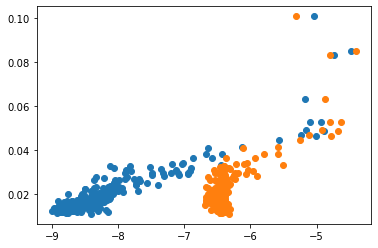

In [207]:
plt.plot(df_result["rms_nu"], df_result["c_D"], "o")
plt.plot(df_result["rms_rho"], df_result["c_D"], "o")

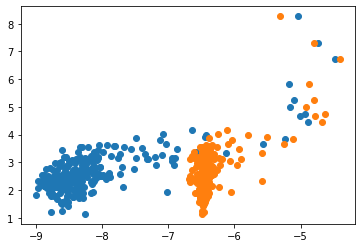

In [208]:
plt.plot(df_result["rms_nu"], df_result["AOA"], "o")
plt.plot(df_result["rms_rho"], df_result["AOA"], "o")

In [209]:
a = df_result["rms_rho"] < -6

In [210]:
Y[a].shape

(580, 3)

C:\Users\Nils\Anaconda3\envs\MA\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


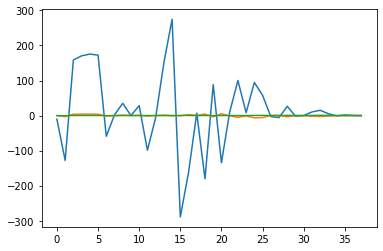

In [211]:
#fig, axes = plt.subplots(1, 1, figsize=(16,40))

plt.plot(U[:r].T * l[:r])

In [212]:
np.dot(dv_mat[0], U.T)

array([ 3.46078043e-07,  3.21613886e-07, -2.93350324e-06])

In [213]:
np.dot(dv_mat[0], U[0]), Y[0,0]

(3.4607804316002955e-07, 7.66641666160992e-06)

In [214]:
c_D = df_result["c_D"].values

In [215]:
c_D

array([0.011605, 0.011163, 0.01297 , 0.012497, 0.012171, 0.013483,
       0.013398, 0.011187, 0.014597, 0.013292, 0.015821, 0.012012,
       0.015211, 0.015144, 0.014759, 0.014414, 0.013169, 0.014733,
       0.013084, 0.013204, 0.012854, 0.013758, 0.012906, 0.014814,
       0.01226 , 0.01257 , 0.013522, 0.013278, 0.013418, 0.013091,
       0.015245, 0.013158, 0.013844, 0.014127, 0.014943, 0.014222,
       0.016025, 0.012907, 0.014612, 0.013244, 0.012788, 0.013447,
       0.013178, 0.01389 , 0.013864, 0.012806, 0.015713, 0.015477,
       0.013691, 0.014239, 0.016649, 0.012795, 0.013323, 0.013553,
       0.012898, 0.01325 , 0.013491, 0.015912, 0.014468, 0.014782,
       0.013342, 0.01306 , 0.013984, 0.013916, 0.012621, 0.016156,
       0.013227, 0.013739, 0.012296, 0.012539, 0.015094, 0.012114,
       0.013787, 0.013271, 0.016361, 0.013673, 0.013397, 0.014163,
       0.014892, 0.014254, 0.013398, 0.011986, 0.012265, 0.011958,
       0.011514, 0.011513, 0.012073, 0.012941, 0.01467 , 0.013

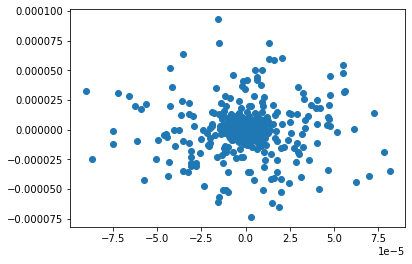

In [216]:
plt.scatter(Y[:,0], Y[:,1]) #, c=df_result["c_D"])
#plt.scatter(Y[:,0], df_result["c_D"]), plt.scatter(Y[:,1], df_result["c_D"]), plt.scatter(Y[:,2], df_result["c_D"])
#plt.scatter(Y[:,:], df_result["c_D"])

In [217]:
from sklearn.manifold import LocallyLinearEmbedding

In [218]:
embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(dv_mat)
#Y = X_transformed

X_transformed.shape

(598, 2)

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
x_train, x_test, y_train, y_test = train_test_split(Y[a], df_result["c_D"][a], test_size=0.2, random_state=21)
#x_train, x_test, y_train, y_test = train_test_split(Y[a], df_meta["AOA"][a], test_size=0.2, random_state=21)
#df_meta

In [221]:
x_train.shape, y_test.shape

((464, 3), (116,))

In [222]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, WhiteKernel)


In [223]:
#kernel = 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-2, 10.0), nu=1.5)

In [224]:
kernel = RBF() + Matern(nu=1.5) #+ WhiteKernel() #+ RBF()

In [225]:
#kernel = ConstantKernel(0.1, (0.01, 10.0)) * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2) + Matern(length_scale=1.0, length_scale_bounds=(1e-2, 10.0), nu=1.5) #+ WhiteKernel(noise_level=0.1)

In [226]:
kernel = ConstantKernel()*Matern(nu=2.5) + ConstantKernel()*Matern(nu=1.5) + WhiteKernel() # + DotProduct()

In [227]:
kernel = 1.0 * RBF(length_scale=0.1e-05, length_scale_bounds=(1e-7, 10.0)) + WhiteKernel(noise_level=0.05)# + ConstantKernel()

In [228]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=3, normalize_y=False)
gp.fit(x_train, y_train)
print(gp.kernel_)
print(gp.score(x_train, y_train))
print(gp.score(x_test, y_test))
print(gp.log_marginal_likelihood())

0.0159**2 * RBF(length_scale=5.52e-05) + WhiteKernel(noise_level=1e-05)
0.680302228468957
0.43329514273641456
2022.2393346956399


In [229]:
#kernel.bounds

Text(0.5, 1.0, 'Validation Data')

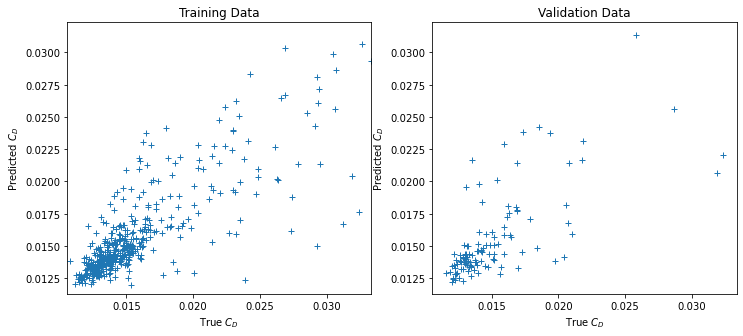

In [230]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)

y_pred = gp.predict(x_train)
y_train.values
#plt.plot(y_pred)
plt.plot(y_train.values, y_pred, '+')

#plt.gca().set_xlim([0.008, 0.042])
#plt.gca().set_ylim([0.008, 0.042])
ax1 = plt.gca()
ax1.set_ylabel("Predicted $C_D$")
ax1.set_xlabel("True $C_D$")
ax1.set_title("Training Data")

plt.subplot(1, 2, 2)

y_pred = gp.predict(x_test)
y_test.values
#plt.plot(y_pred)
plt.plot(y_test.values, y_pred, '+', label="asd")
#plt.plot(y_pred, 'o', c="r")
ax1.set_xlim(plt.gca().get_xlim())
ax1.set_ylim(plt.gca().get_ylim())
ax2 = plt.gca()
ax2.set_ylabel("Predicted $C_D$")
ax2.set_xlabel("True $C_D$")
ax2.set_title("Validation Data")

In [231]:
r

3

In [232]:
plt.plot(Y[:,4][a], df_result["c_D"][a], "o")

IndexError: index 4 is out of bounds for axis 1 with size 3

In [ ]:
np.sum(df_result["rms_rho"] < -6)

In [ ]:
y_lb = np.min(Y[a])
y_ub = np.max(Y[a])
y_lb, y_ub

In [ ]:
X_ = np.linspace(y_lb, y_ub, 100)
#y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)

In [ ]:
#np.dot(U[0, :, np.newaxis], X_[np.newaxis, :])
X_ = np.zeros((r, 100))
X_[0] = np.linspace(y_lb, y_ub, 100)

In [ ]:
y_mean, y_std = gp.predict(X_.T, return_std=True)

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(X_[0], y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_[0], y_mean - y_std, y_mean + y_std, alpha=0.2, color='k')
y_samples = gp.sample_y(X_.T, 5)
plt.plot(X_[0], y_samples, lw=1)
plt.scatter(x_train[:, 0], y_train, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), )
plt.scatter(x_test[:, 0], y_test, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))

In [ ]:
np.dot(X_, np.ones((20,1)))

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, WhiteKernel)


kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2)  + WhiteKernel(),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

for kernel in kernels:
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # Plot posterior
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

In [ ]:
df_result["c_D"].argmin()

#### 

In [ ]:
df_result.loc[706]